In [ ]:
## boosting 

## bagging 은 한번에 병렬적으로 결과를 적용
## boosting 은 병렬적으로 분류기를 계속 통과시키면서 분류함 


In [1]:
import pandas as pd
import numpy as np

red_wine = pd.read_csv('../data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('../data/winequality-white.csv', sep = ';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis =1)
y = wine['taste']

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc  = sc.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)


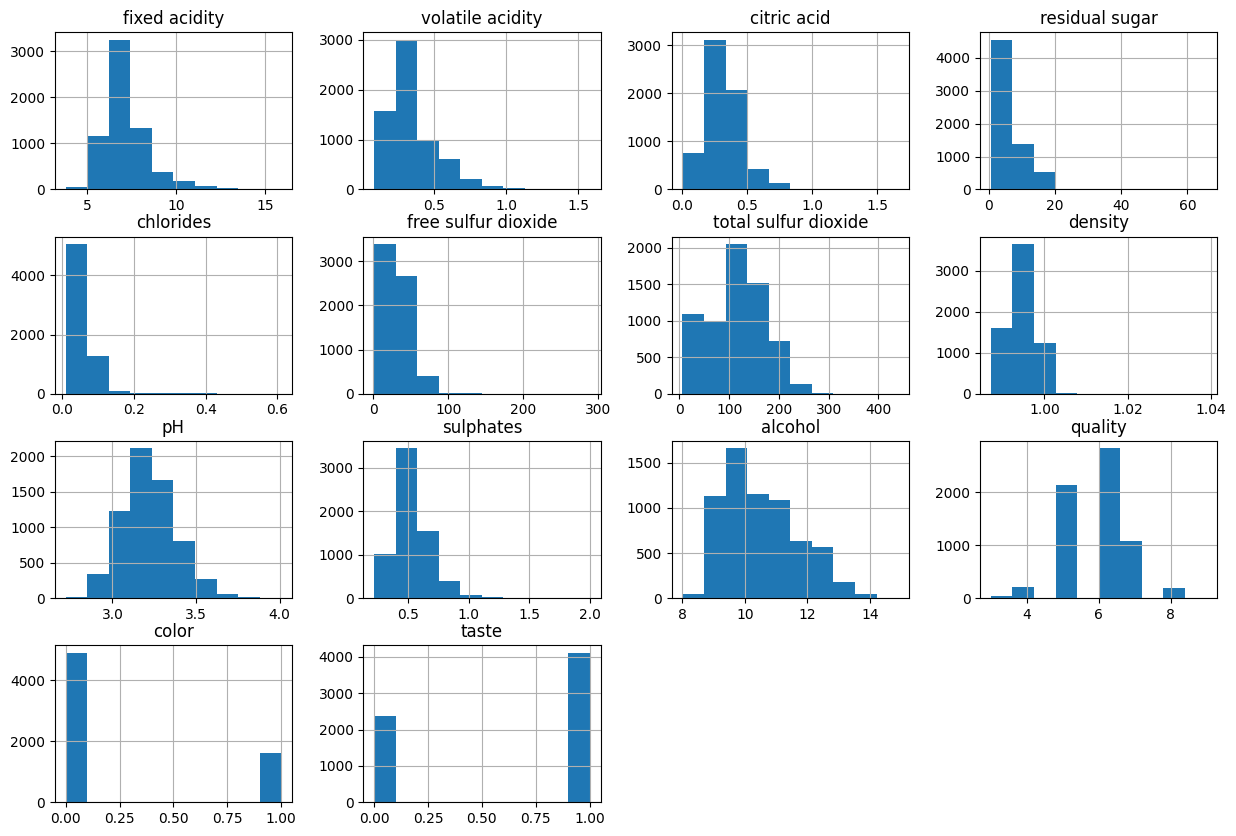

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize = (15,10))
plt.show()

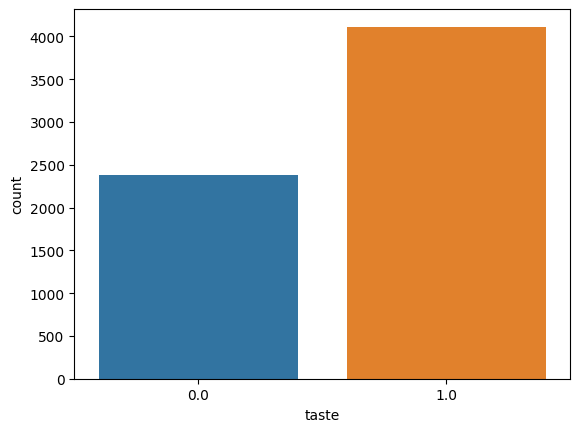

In [8]:
import seaborn as sns

sns.countplot(x=wine['taste'])
plt.show()


## 다양한  모델을 한번에 테스트하자 

In [5]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifer', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifer', GradientBoostingClassifier()))
models.append(('LogisticRegrression', LogisticRegression()))



In [7]:
from sklearn.model_selection import KFold, cross_val_score, KFold

In [9]:
results =[]
names = []

for name, model in models:
    kfold = KFold(n_splits = 5, random_state=13, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifer 0.8187338046938624 0.02084581392656192
DecisionTreeClassifier 0.756395572666025 0.013030256386396672
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifer 0.7663959428444511 0.021596556352125432
LogisticRegrression 0.7385007773746947 0.011708462474986072


/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

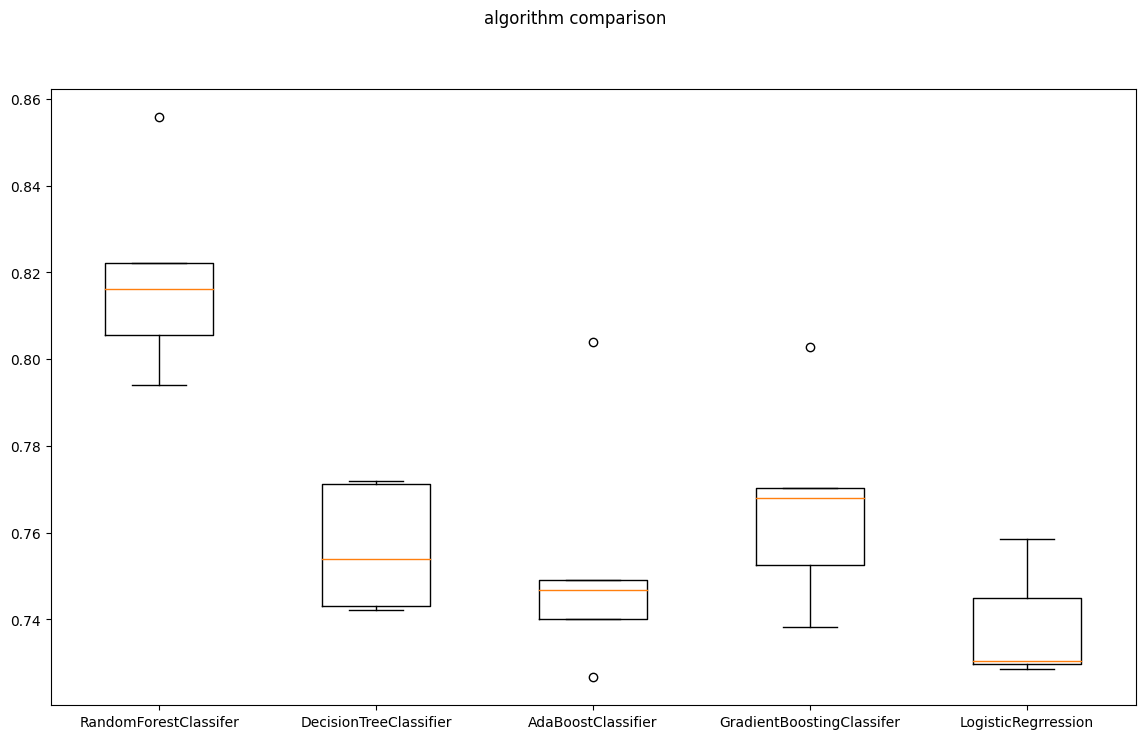

In [11]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()